In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import xarray as xr
from tqdm import tqdm_notebook
import cmocean.cm as cmo

plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

font = {'family' : 'Arial',
        'weight' : 'ultralight',
        'size'   : 13}

matplotlib.rc('font', **font)

rc('ytick.major', size=4)
rc('xtick.major', size=4)
rc('ytick.minor', size=4)
rc('xtick.minor', size=4)
rc('lines', linewidth=1.5)

Populating the interactive namespace from numpy and matplotlib


In [3]:
xds = xr.open_dataset('5904467_Sprof.nc')

In [8]:
df_soccom_dpt = pd.DataFrame(xds.PRES_ADJUSTED.values.T)
df_soccom_dpt = df_soccom_dpt.rename(columns=pd.Series(xds.JULD.values))

df_soccom = pd.DataFrame(xds.JULD.values)
df_soccom['Lon'] = pd.DataFrame(xds.LONGITUDE.values)
df_soccom['Lat'] = pd.DataFrame(xds.LATITUDE.values)
df_soccom = df_soccom.rename(columns={0: "Time"})

ts = df_soccom['Time']
up_prof=[]
prof_no=np.arange(len(ts))

for i, val in enumerate(np.unique(ts)):
    
    ind = ts==val
    up_prof+=prof_no[ind][0],
    
df_soccom_up = df_soccom.loc[up_prof]

In [9]:
df_soccom_up

,Time,Lon,Lat
0,2014-12-14 18:48:50.002000640,0.07600,-59.998000
1,2014-12-25 00:45:45.000065280,0.68500,-60.250000
2,2015-01-04 06:42:52.000704768,1.39700,-60.399000
3,2015-01-14 12:59:44.001373184,2.10729,-60.434515
4,2015-01-24 19:04:31.002044416,2.81700,-60.470000
...,...,...,...
156,2019-05-06 18:53:50.002008064,0.97500,-60.237000
157,2019-05-17 02:31:20.000259584,0.79400,-60.197000
158,2019-05-27 09:50:37.001038080,0.54400,-60.123000
159,2019-06-06 16:34:48.001765888,0.34800,-60.055000


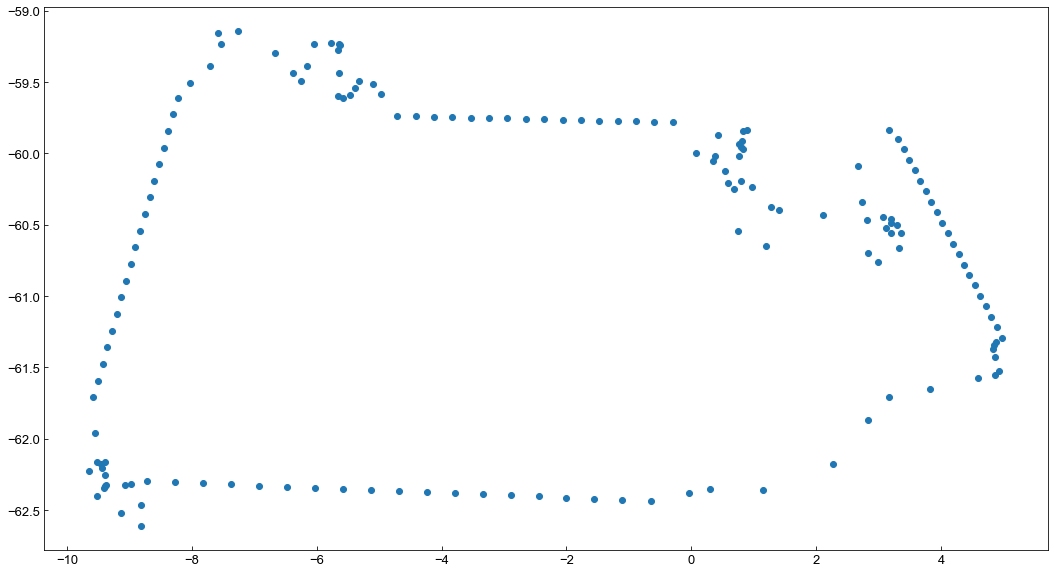

In [10]:
scatter(df_soccom_up.Lon, df_soccom_up.Lat)

In [11]:
pres=df_soccom_dpt.values[:, up_prof]
temp=xds.TEMP_ADJUSTED.values[up_prof, :]
salt=xds.PSAL_ADJUSTED.values[up_prof, :]

In [20]:
xds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_LEVELS: 557, N_PARAM: 7, N_PROF: 161)
Dimensions without coordinates: N_CALIB, N_LEVELS, N_PARAM, N_PROF
Data variables: (12/79)
    DATA_TYPE                     object b'Argo synthetic profile          '
    FORMAT_VERSION                object b'1.0 '
    HANDBOOK_VERSION              object b'1.2 '
    REFERENCE_DATE_TIME           object b'19500101000000'
    DATE_CREATION                 object b'20201223115204'
    DATE_UPDATE                   object b'20201223115204'
    ...                            ...
    NITRATE                       (N_PROF, N_LEVELS) float32 nan nan ... 32.4
    NITRATE_QC                    (N_PROF, N_LEVELS) object nan nan ... b'4'
    NITRATE_dPRES                 (N_PROF, N_LEVELS) float32 nan nan ... 0.0 0.0
    NITRATE_ADJUSTED              (N_PROF, N_LEVELS) float32 nan nan ... nan nan
    NITRATE_ADJUSTED_QC           (N_PROF, N_LEVELS) object nan nan ... b'4'
    NITRATE_ADJUSTED_ERROR        (N_PROF, N_LEVELS) float32 nan nan ... nan nan
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2020-12-23T11:52:04Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.10 (version 30.06.2020 for ARGO_simplified_profile)

In [12]:
from scipy.interpolate import griddata

temp_soccom = np.ndarray([1500, len(temp)])
salt_soccom = np.ndarray([1500, len(temp)])

zz = arange(1500)

for i in tqdm_notebook(range(len(temp))):
    
    temp_soccom[:, i] = griddata(pres[:, i], temp[i, :], zz, method='linear')
    salt_soccom[:, i] = griddata(pres[:, i], salt[i, :], zz, method='linear')

<ipython-input-12-cf29fd038688>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(temp))):


  0%|          | 0/161 [00:00<?, ?it/s]

In [13]:
import cmocean

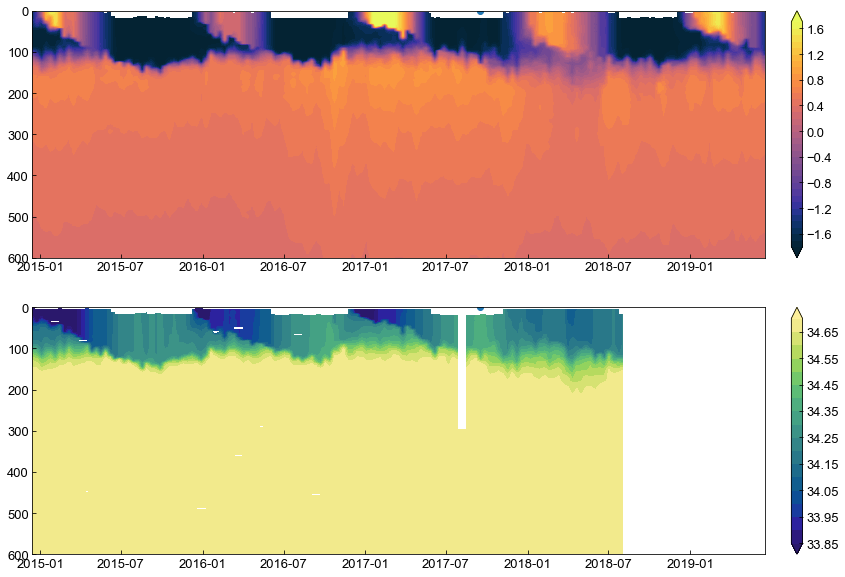

In [14]:
fig, ax = subplots(2, figsize=[16, 10])
fig.subplots_adjust(hspace=0.2)

img=ax[0].contourf(xds.JULD.values[up_prof], zz, temp_soccom, levels=arange(-1.8, 1.8, 0.1), cmap=cmocean.cm.thermal, extend='both')
ax[0].set_ylim(600, 0)
colorbar(img, ax=ax[0], pad=0.03)

img=ax[1].contourf(xds.JULD.values[up_prof], zz, salt_soccom, levels=arange(33.85, 34.75, 0.05), cmap=cmocean.cm.haline, extend='both')
ax[1].set_ylim(600, 0)
colorbar(img, ax=ax[1], pad=0.03)

ax[0].scatter(xds.JULD.values[up_prof][98], 0)
ax[1].scatter(xds.JULD.values[up_prof][98], 0)
# ax[1].set_xlabel('Distance travelled [km]', labelpad=15, fontsize=16)

In [81]:
pwd

'/Users/marcel/Google Drive/Projects/seaice_psom_paper/seaice_psom/insitu_data/soccom_float'

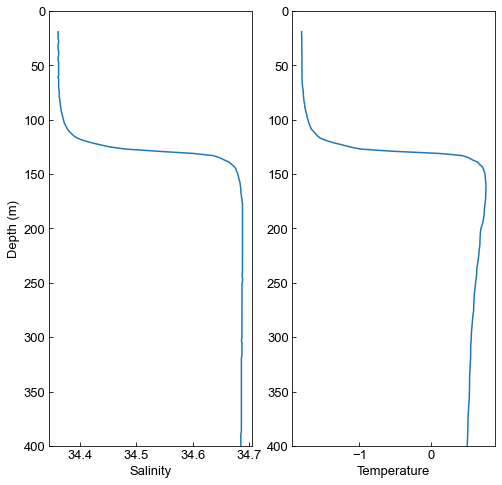

In [80]:
fig,ax=subplots(1,2, figsize=[8,8])

ax[0].plot(salt_soccom[:,98], zz)
ax[1].plot(temp_soccom[:,98], zz)

[a.set_ylim(400, 0) for a in ax]

ax[0].set_xlabel('Salinity')
ax[1].set_xlabel('Temperature')

ax[0].set_ylabel('Depth (m)')

savefig('soccom_southern_profile.png', dpi=300)

Save the profile

In [76]:
soccom_profile = ds = xr.Dataset(

    data_vars=dict(

        temperature=(["depth"], temp_soccom[:,98]),
        salinity   =(["depth"], salt_soccom[:,98]),

    ),

    coords=dict(

        depth=zz,

    ),

    attrs=dict(description="SOCCOM float data to use for southern part of domain"),

)

In [78]:
soccom_profile.to_netcdf('soccom_southern_profile.nc')